In [2]:
#imports

from wrangle_wine import wrangle_wine, viz_explore, summarize

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

In [3]:
# getting data
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_wine()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6               7.9              0.60         0.06             1.6      0.069   
9               7.5              0.50         0.36             6.1      0.071   
10              7.5              0.50         0.36             6.1      0.071   
11              6.7              0.58         0.08             1.8      0.097   
16              8.5              0.28         0.56             1.8      0.092   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [4]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white_wine
2024,7.0,0.21,0.28,8.6,0.045,37.0,221.0,0.99540,3.25,0.54,10.4,6,1
429,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5,0
4625,8.4,0.22,0.30,8.9,0.024,17.0,118.0,0.99456,2.99,0.34,10.5,6,1
1092,7.0,0.54,0.09,2.0,0.081,10.0,16.0,0.99479,3.43,0.59,11.5,6,0
4422,7.6,0.27,0.34,5.0,0.040,18.0,56.0,0.99084,3.06,0.48,12.4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823,5.4,0.22,0.35,6.5,0.029,26.0,87.0,0.99092,3.29,0.44,12.5,7,1
410,9.0,0.43,0.34,2.5,0.080,26.0,86.0,0.99870,3.38,0.62,9.5,6,0
655,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5,5,0
4673,6.5,0.36,0.38,10.2,0.028,20.0,82.0,0.99274,3.10,0.43,12.1,7,1


In [5]:
summarize(train)

                    SUMMARY REPORT


Dataframe head: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white_wine
2024,7.0,0.21,0.28,8.6,0.045,37.0,221.0,0.99540,3.25,0.54,10.4,6,1
429,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5,0
4625,8.4,0.22,0.30,8.9,0.024,17.0,118.0,0.99456,2.99,0.34,10.5,6,1




Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2706 entries, 2024 to 6280
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2706 non-null   float64
 1   volatile acidity      2706 non-null   float64
 2   citric acid           2706 non-null   float64
 3   residual sugar        2706 non-null   float64
 4   chlorides             2706 non-null   float64
 5   free sulfur dioxide   2706 non-null   float64
 6   total sulfur dioxide  2706 non-null   float64
 7   density               2706 non-null   float64
 8   pH                    2706 non-null   float64
 9   sulphates             2706 non-null   float64
 10  alcohol               2706 non-null   float64
 11  quality               2706 non-null   int64  
 12  white_wine            2706 non-null   uint8  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 277.5 KB


""




Dataframe Description: 


,count,mean,std,min,25%,50%,75%,max
fixed acidity,2706.0,6.971360,0.877826,4.70000,6.400,6.900000,7.500000,9.6000
volatile acidity,2706.0,0.300240,0.116459,0.08000,0.220,0.280000,0.350000,0.6500
citric acid,2706.0,0.314982,0.100749,0.04000,0.260,0.310000,0.370000,0.6000
residual sugar,2706.0,5.616648,4.469492,0.60000,1.800,4.000000,8.500000,17.5000
chlorides,2706.0,0.047868,0.016379,0.00900,0.037,0.045000,0.054000,0.1040
free sulfur dioxide,2706.0,31.799335,15.508152,2.00000,20.000,30.000000,42.000000,76.0000
total sulfur dioxide,2706.0,124.900961,50.212226,7.00000,94.250,125.000000,159.750000,256.0000
density,2706.0,0.994231,0.002753,0.98711,0.992,0.994275,0.996355,1.0017
pH,2706.0,3.210244,0.149032,2.80000,3.110,3.200000,3.310000,3.6300
sulphates,2706.0,0.503278,0.115567,0.22000,0.420,0.490000,0.570000,0.8500


DataFrame value counts: 


,fixed acidity
"(4.694, 5.19]",28
"(5.19, 5.68]",86
"(5.68, 6.17]",333
"(6.17, 6.66]",592
"(6.66, 7.15]",651
"(7.15, 7.64]",491
"(7.64, 8.13]",244
"(8.13, 8.62]",149
"(8.62, 9.11]",77
"(9.11, 9.6]",55


,volatile acidity
"(0.0784, 0.137]",61
"(0.137, 0.194]",376
"(0.194, 0.251]",678
"(0.251, 0.308]",532
"(0.308, 0.365]",446
"(0.365, 0.422]",227
"(0.422, 0.479]",117
"(0.479, 0.536]",100
"(0.536, 0.593]",85
"(0.593, 0.65]",84


,citric acid
"(0.0384, 0.096]",69
"(0.096, 0.152]",87
"(0.152, 0.208]",141
"(0.208, 0.264]",472
"(0.264, 0.32]",663
"(0.32, 0.376]",627
"(0.376, 0.432]",301
"(0.432, 0.488]",125
"(0.488, 0.544]",178
"(0.544, 0.6]",43


,residual sugar
"(0.582, 2.29]",965
"(2.29, 3.98]",380
"(3.98, 5.67]",245
"(5.67, 7.36]",237
"(7.36, 9.05]",267
"(9.05, 10.74]",165
"(10.74, 12.43]",142
"(12.43, 14.12]",124
"(14.12, 15.81]",131
"(15.81, 17.5]",50


,chlorides
"(0.0079, 0.0185]",18
"(0.0185, 0.028]",111
"(0.028, 0.0375]",624
"(0.0375, 0.047]",824
"(0.047, 0.0565]",554
"(0.0565, 0.066]",176
"(0.066, 0.0755]",151
"(0.0755, 0.085]",135
"(0.085, 0.0945]",73
"(0.0945, 0.104]",40


,free sulfur dioxide
"(1.925, 9.4]",174
"(9.4, 16.8]",301
"(16.8, 24.2]",472
"(24.2, 31.6]",486
"(31.6, 39.0]",454
"(39.0, 46.4]",299
"(46.4, 53.8]",252
"(53.8, 61.2]",166
"(61.2, 68.6]",73
"(68.6, 76.0]",29


,total sulfur dioxide
"(6.75, 31.9]",143
"(31.9, 56.8]",139
"(56.8, 81.7]",191
"(81.7, 106.6]",459
"(106.6, 131.5]",579
"(131.5, 156.4]",469
"(156.4, 181.3]",356
"(181.3, 206.2]",234
"(206.2, 231.1]",98
"(231.1, 256.0]",38


,density
"(0.986, 0.989]",14
"(0.989, 0.99]",149
"(0.99, 0.991]",357
"(0.991, 0.993]",440
"(0.993, 0.994]",447
"(0.994, 0.996]",476
"(0.996, 0.997]",402
"(0.997, 0.999]",324
"(0.999, 1.0]",87
"(1.0, 1.002]",10


,pH
"(2.798, 2.883]",24
"(2.883, 2.966]",107
"(2.966, 3.049]",234
"(3.049, 3.132]",478
"(3.132, 3.215]",593
"(3.215, 3.298]",499
"(3.298, 3.381]",427
"(3.381, 3.464]",211
"(3.464, 3.547]",95
"(3.547, 3.63]",38


,sulphates
"(0.218, 0.283]",18
"(0.283, 0.346]",143
"(0.346, 0.409]",418
"(0.409, 0.472]",627
"(0.472, 0.535]",535
"(0.535, 0.598]",439
"(0.598, 0.661]",269
"(0.661, 0.724]",118
"(0.724, 0.787]",80
"(0.787, 0.85]",59


,alcohol
"(8.393, 8.96]",104
"(8.96, 9.52]",657
"(9.52, 10.08]",384
"(10.08, 10.64]",429
"(10.64, 11.2]",404
"(11.2, 11.76]",252
"(11.76, 12.32]",238
"(12.32, 12.88]",160
"(12.88, 13.44]",60
"(13.44, 14.0]",18


,quality
"(3.996, 4.3]",77
"(4.3, 4.6]",0
"(4.6, 4.9]",0
"(4.9, 5.2]",846
"(5.2, 5.5]",0
"(5.5, 5.8]",0
"(5.8, 6.1]",1265
"(6.1, 6.4]",0
"(6.4, 6.7]",0
"(6.7, 7.0]",518


,white_wine
"(-0.002, 0.1]",392
"(0.1, 0.2]",0
"(0.2, 0.3]",0
"(0.3, 0.4]",0
"(0.4, 0.5]",0
"(0.5, 0.6]",0
"(0.6, 0.7]",0
"(0.7, 0.8]",0
"(0.8, 0.9]",0
"(0.9, 1.0]",2314


nulls in dataframe by column: 


,num_rows_missing,percent_rows_missing
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


nulls in dataframe by row: 


,num_cols_missing,percent_cols_missing
2024,0,0.0
2150,0,0.0
4569,0,0.0
825,0,0.0
4017,0,0.0
...,...,...
1397,0,0.0
4051,0,0.0
2501,0,0.0
4266,0,0.0


Starting Questions of interest for me:
* Citric Acid
* Residual Sugar
* Density
* pH
* Alcohol

Correlations of interests:
- All columns with acid in the name as well as pH

Initial assumptions: most of the different acidic levels will be correlated around a similar range

Initial Assumptions: the lower the pH the higher the alcohol content/the more acidic it is

Initial assumptions: residul sugar and density may have a correlations as well


Univariate Analysis

* Quality: majority are around 6, also 
* Fixed acididty: normally distributed
* **Volitile acididty: poisson? Not normally distributed**
* Citric Acid: I think normally distributed?? 
    * Clustering: Right around .5 there is a change which may be a cluster to explore
* Residual sugar: Poisson, not normally distributed
    * Clustering: Maybe? The beginning of it compared to the rest. Why are so many of the wines with low sugar residuals
* **Chlorides: Not normally distributed**
    * Clustering: Possibly the huge jump in the middle is an area of interest
    * Later: More granular bins to see if there is more to see in that group
* Free sulfur dioxide: almost normal
    * Clustering: dont see any
* Total sulfur dioxide: not normal
    * Clustering: beginning vs the end
* **Density: not normal, almost uniform**
* pH: Normal distrubtion
* Sulphates: not normal
* **alcohol: not normal**
* White_wine: vast majority are white wines


cat_cols: ['quality', 'white_wine']
num_cols: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Univariate assessment of feature quality:


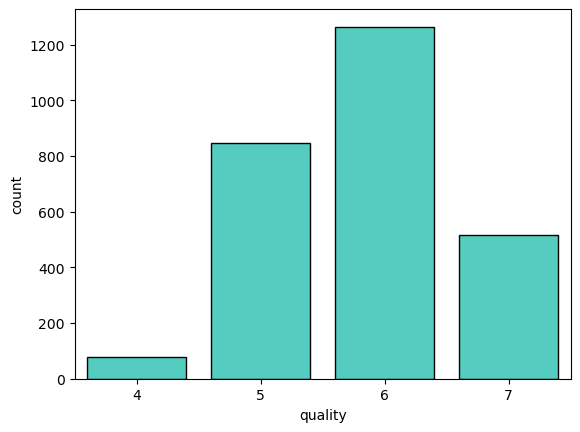

Univariate assessment of feature white_wine:


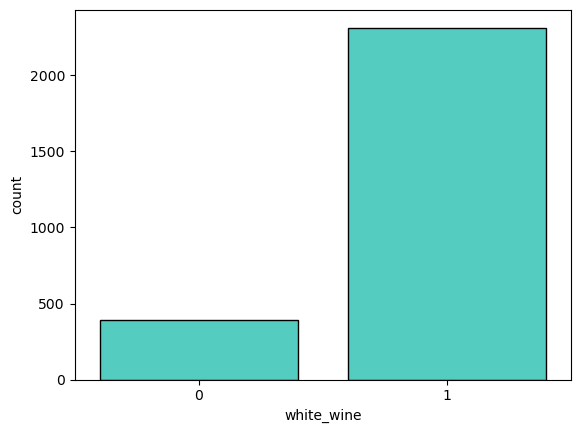

Univariate feature analysis of feature fixed acidity: 


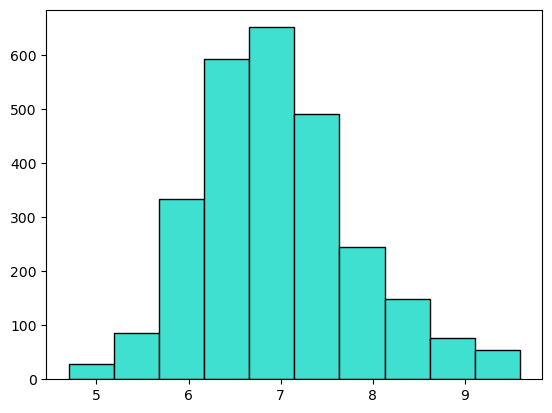

Univariate feature analysis of feature volatile acidity: 


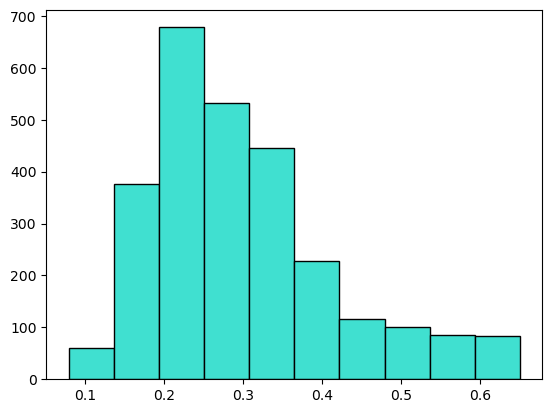

Univariate feature analysis of feature citric acid: 


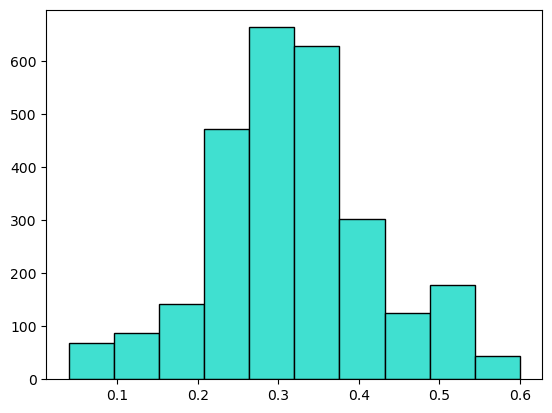

Univariate feature analysis of feature residual sugar: 


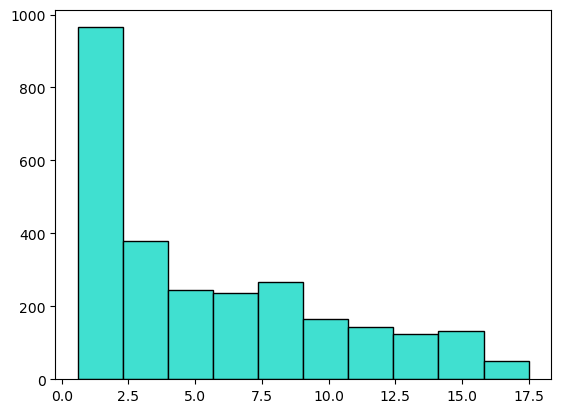

Univariate feature analysis of feature chlorides: 


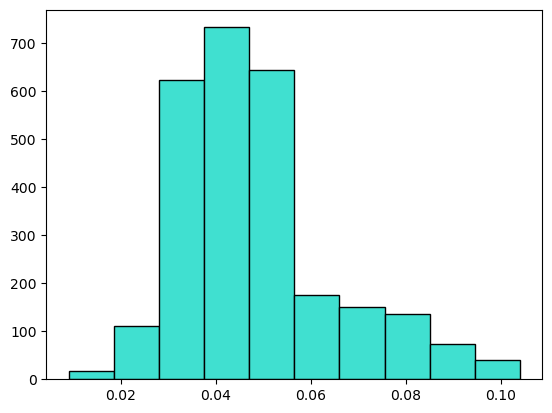

Univariate feature analysis of feature free sulfur dioxide: 


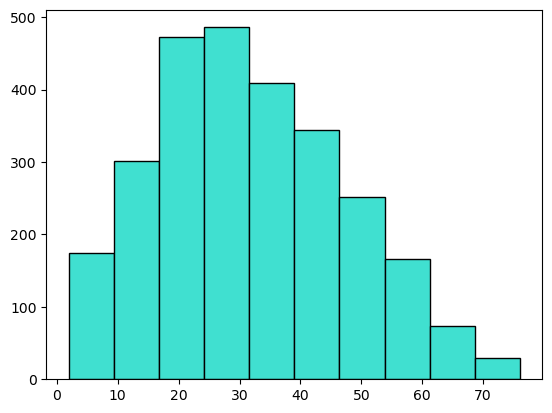

Univariate feature analysis of feature total sulfur dioxide: 


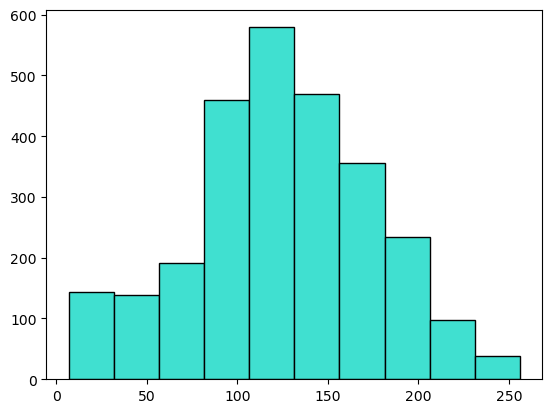

Univariate feature analysis of feature density: 


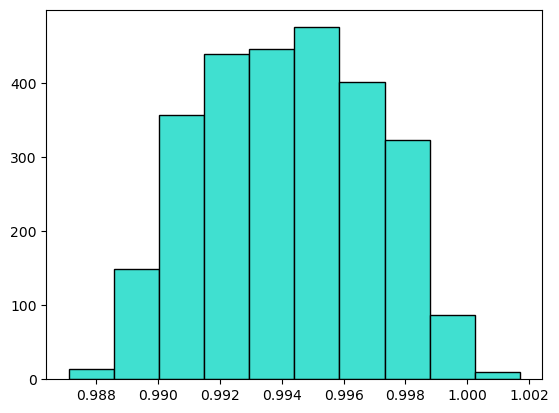

Univariate feature analysis of feature pH: 


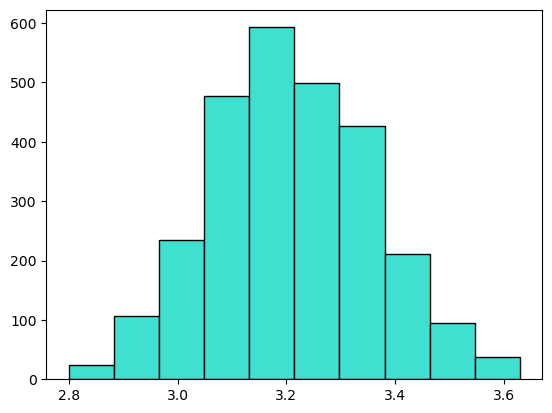

Univariate feature analysis of feature sulphates: 


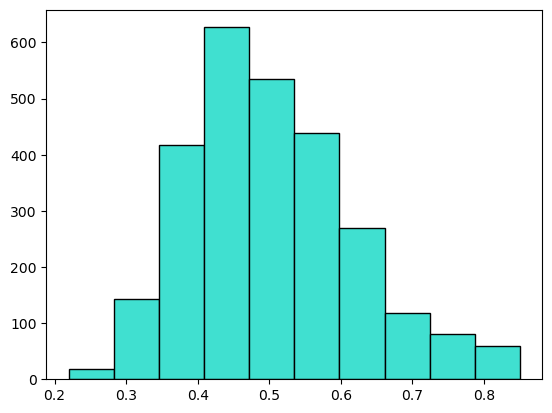

Univariate feature analysis of feature alcohol: 


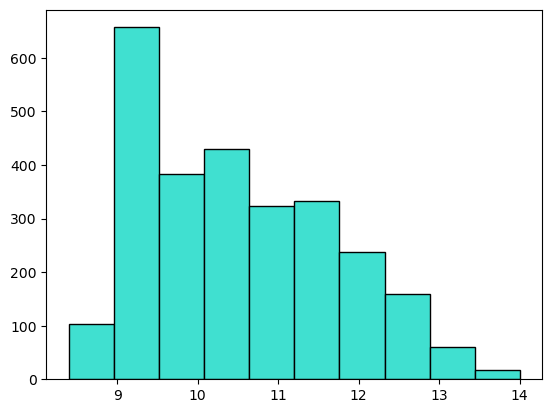

_____________________________________________________
_____________________________________________________

Numeric Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Categorical Columns: ['quality', 'white_wine']
Bivariate assessment of feature white_wine:


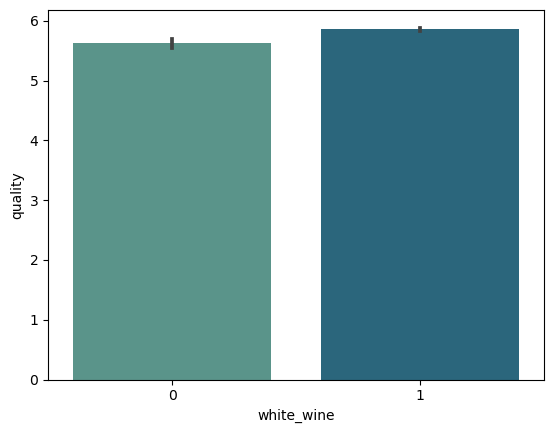

Bivariate feature analysis of feature fixed acidity: 


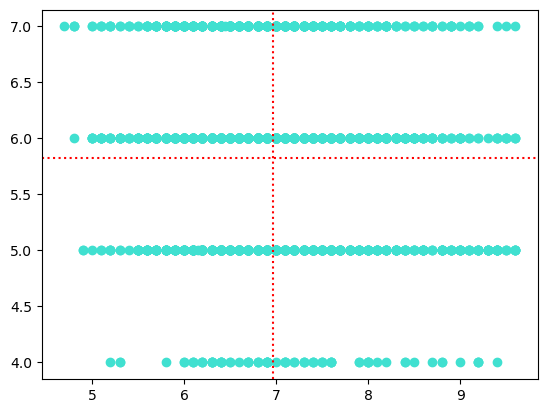

Bivariate feature analysis of feature volatile acidity: 


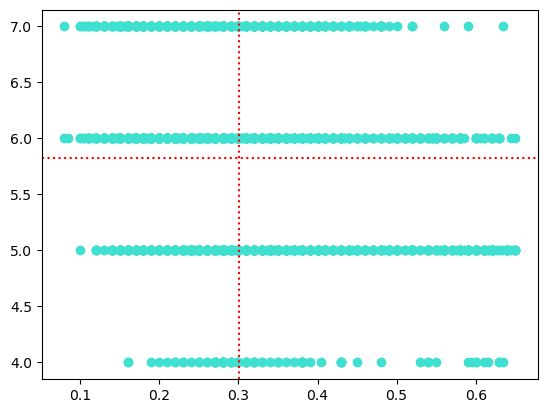

Bivariate feature analysis of feature citric acid: 


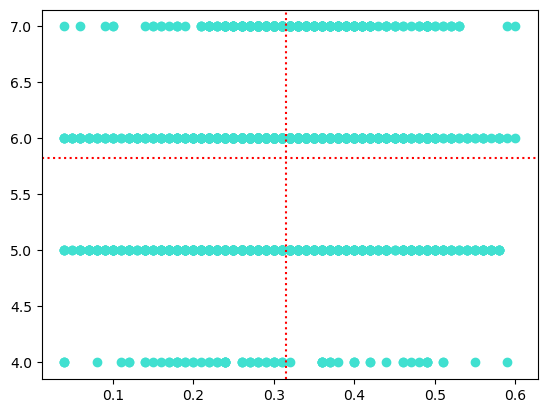

Bivariate feature analysis of feature residual sugar: 


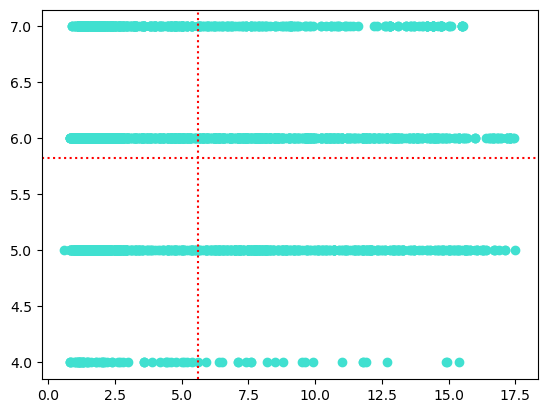

Bivariate feature analysis of feature chlorides: 


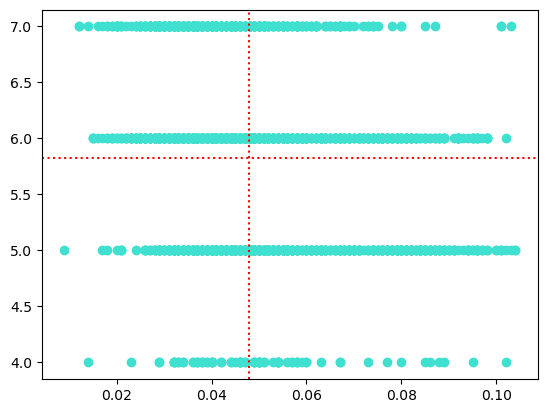

Bivariate feature analysis of feature free sulfur dioxide: 


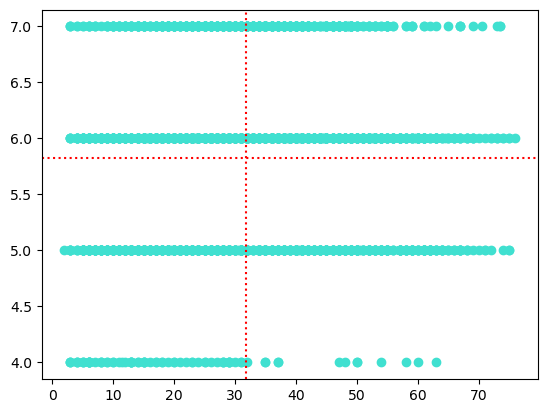

Bivariate feature analysis of feature total sulfur dioxide: 


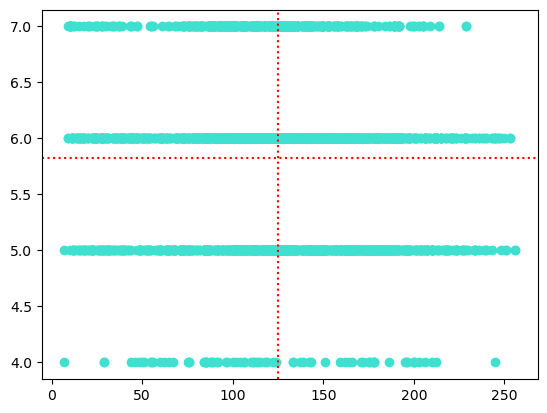

Bivariate feature analysis of feature density: 


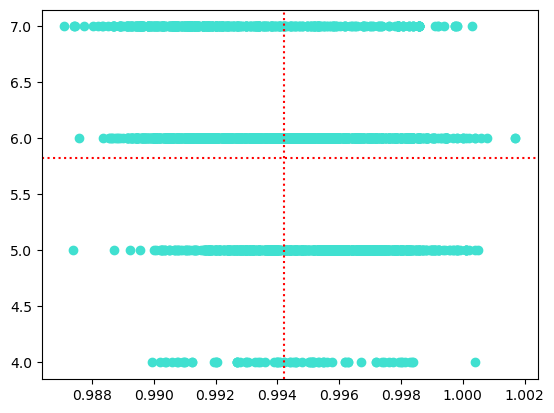

Bivariate feature analysis of feature pH: 


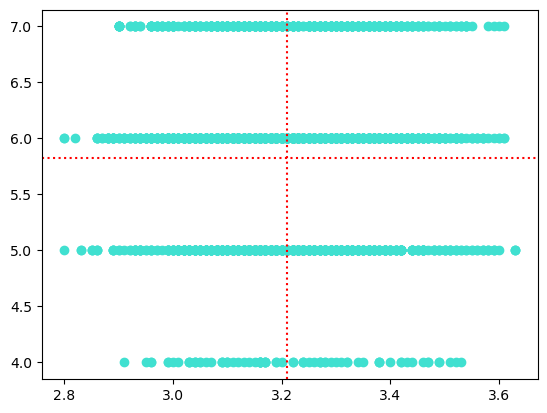

Bivariate feature analysis of feature sulphates: 


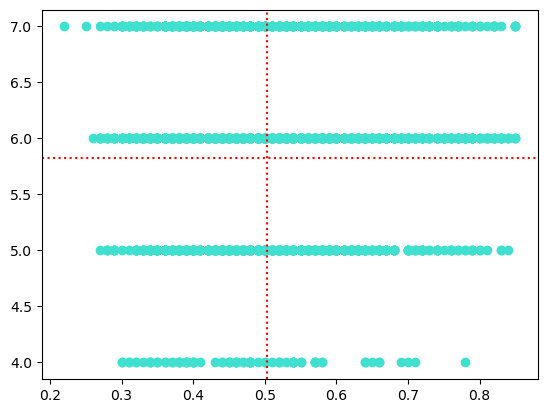

Bivariate feature analysis of feature alcohol: 


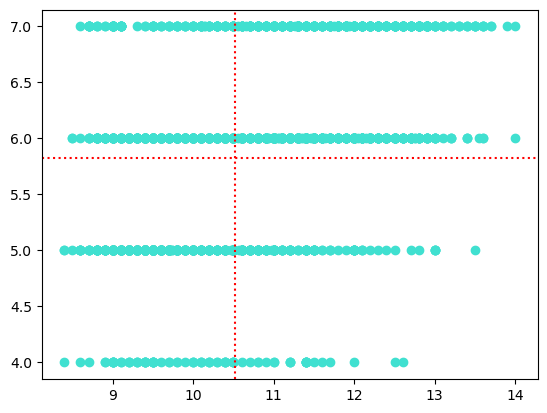

_____________________________________________________
_____________________________________________________



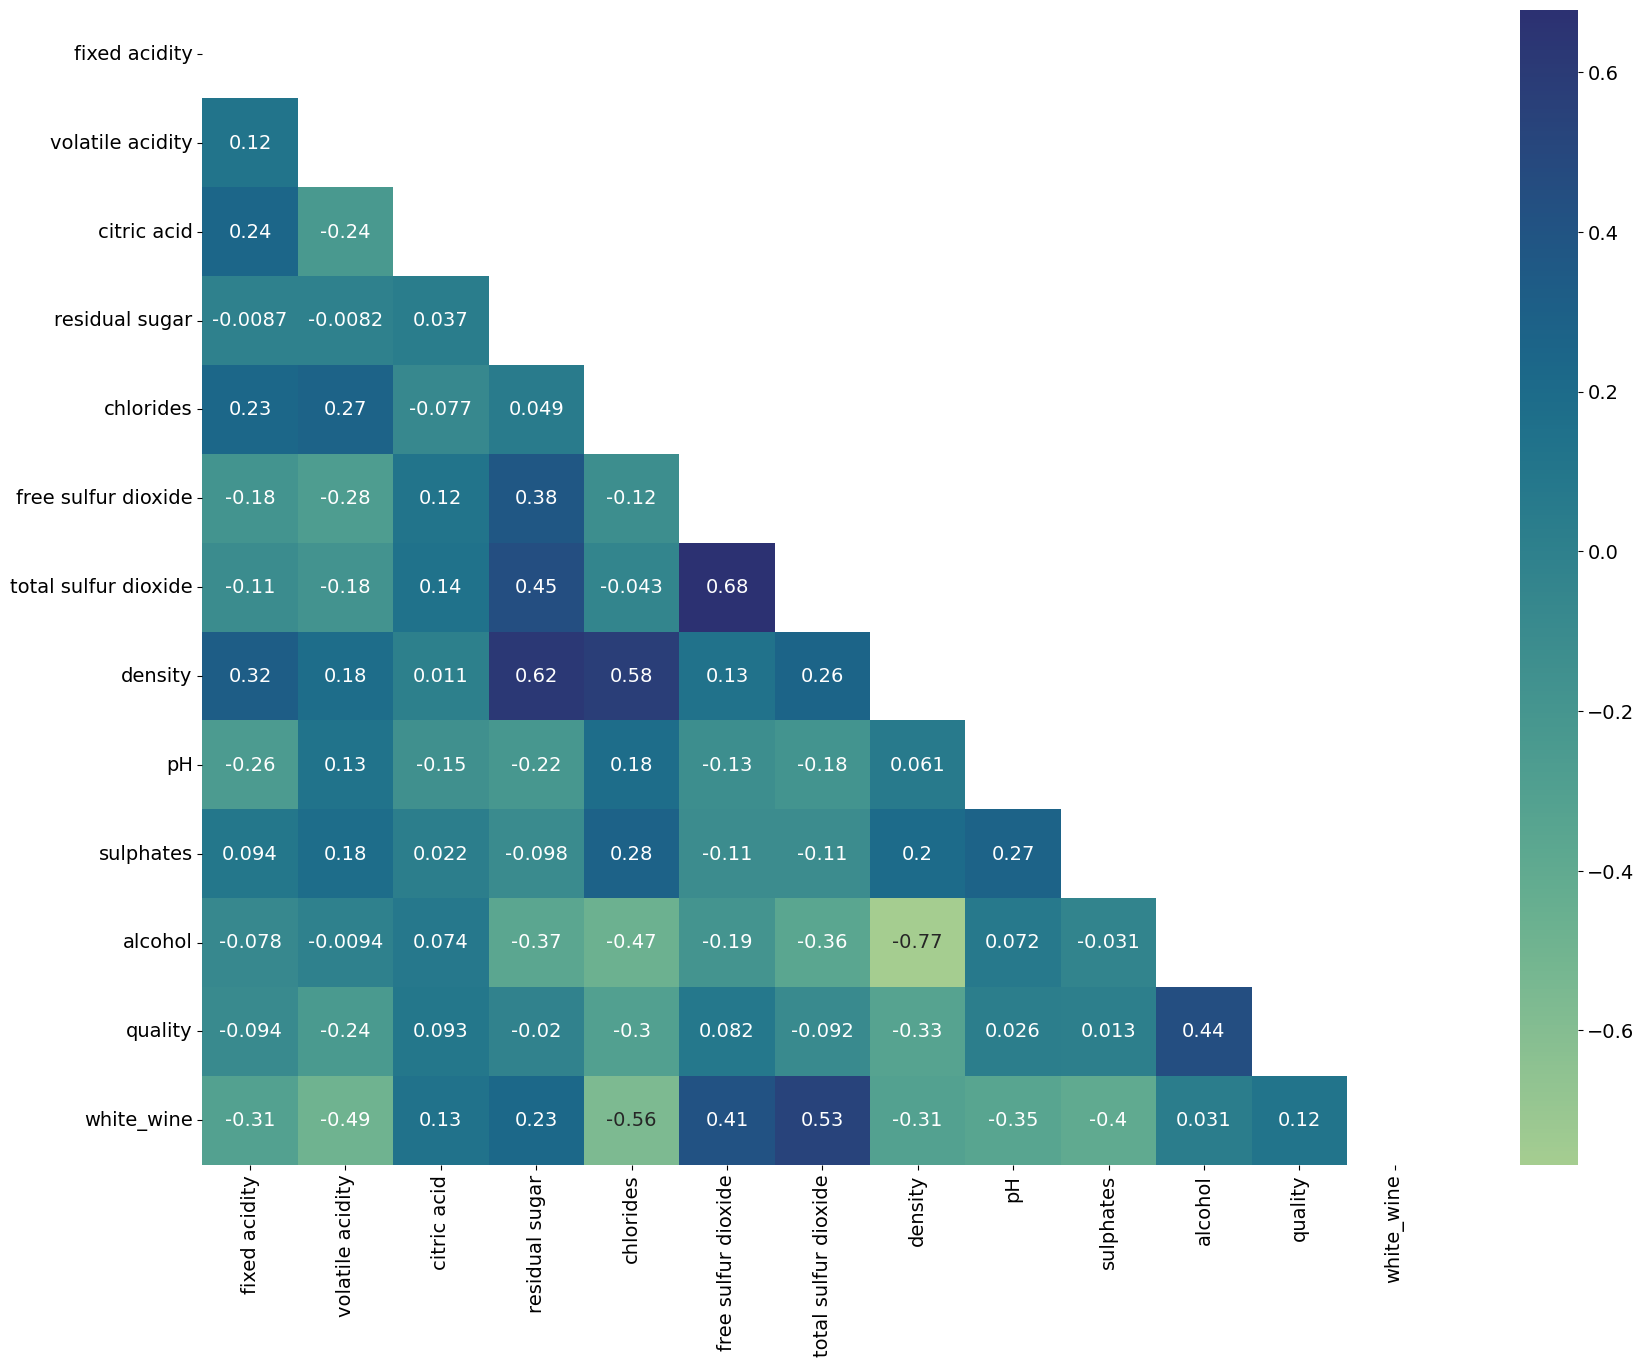

In [6]:
viz_explore(train, 'quality')

Bivariate assessment of feature fixed acidity:


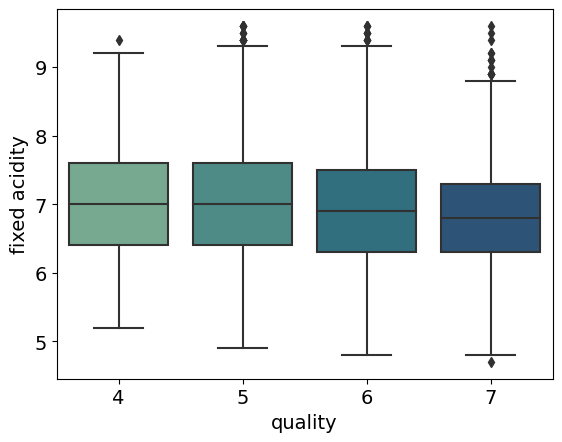

Bivariate assessment of feature volatile acidity:


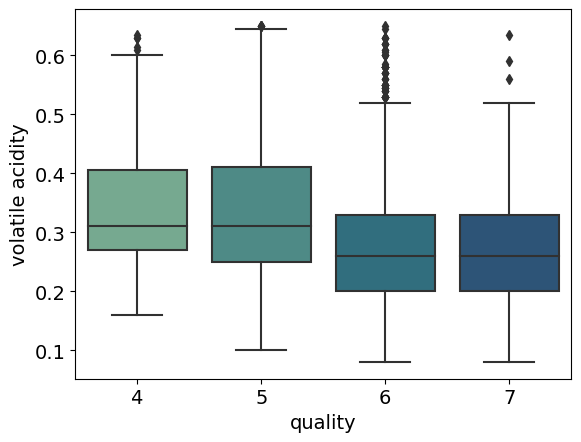

Bivariate assessment of feature citric acid:


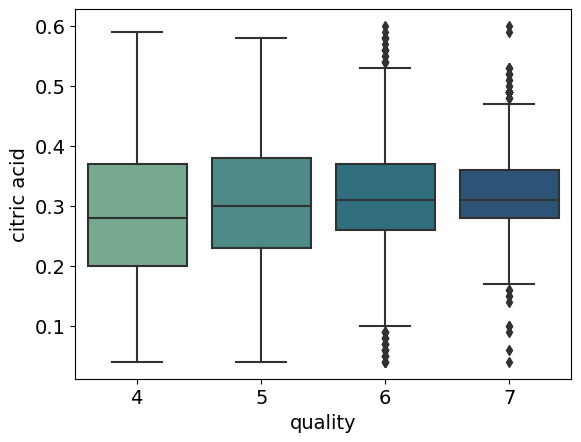

Bivariate assessment of feature residual sugar:


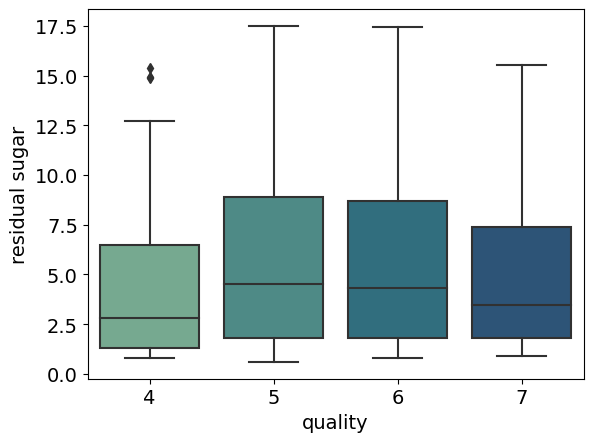

Bivariate assessment of feature chlorides:


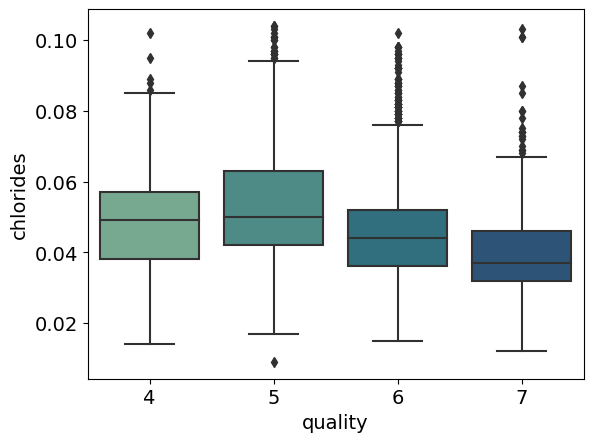

Bivariate assessment of feature free sulfur dioxide:


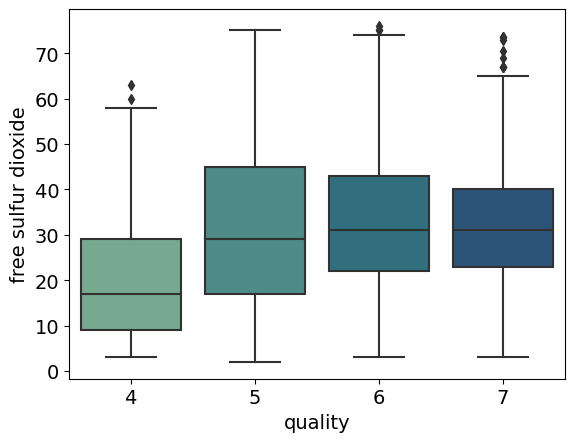

Bivariate assessment of feature total sulfur dioxide:


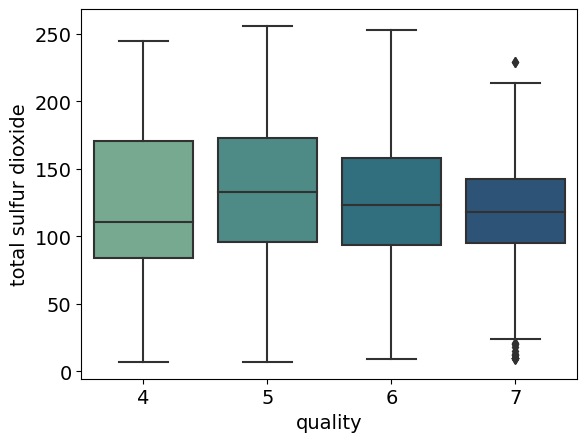

Bivariate assessment of feature density:


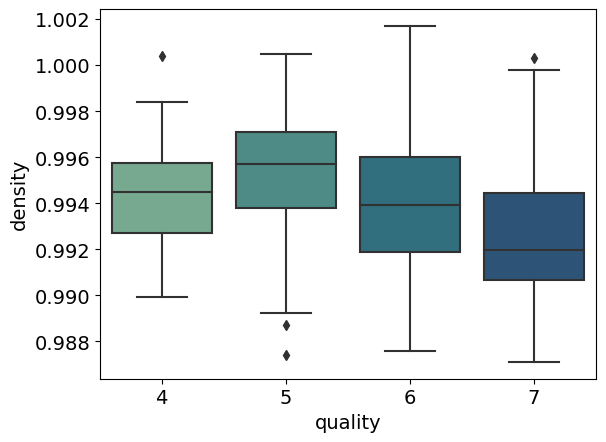

Bivariate assessment of feature pH:


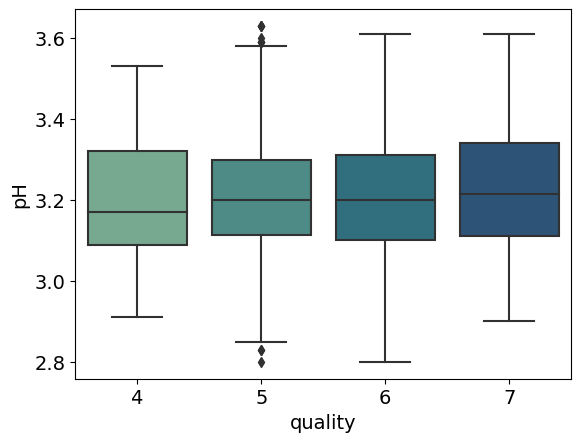

Bivariate assessment of feature sulphates:


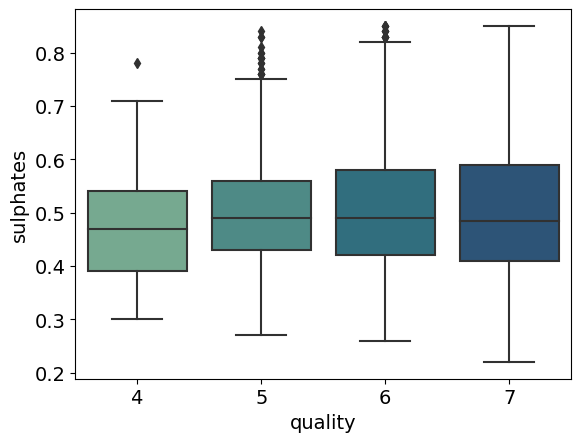

Bivariate assessment of feature alcohol:


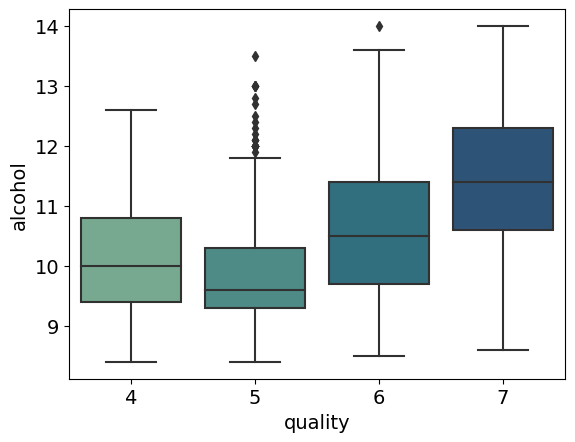

Bivariate assessment of feature white_wine:


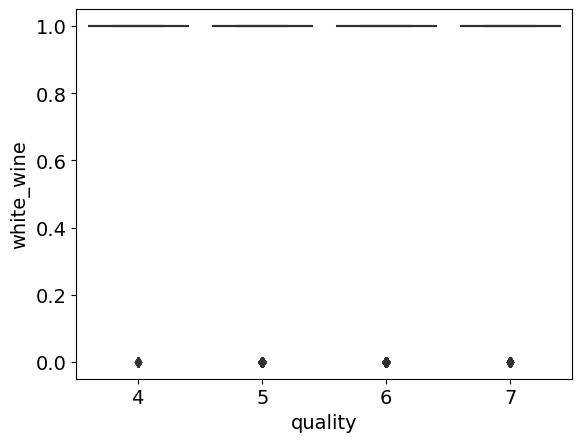

_____________________________________________________
_____________________________________________________



In [7]:
target = 'quality'
explore_cols = train.columns.to_list()

for col in explore_cols:
    if col != target:
        print(f'Bivariate assessment of feature {col}:')
        sns.boxplot(data = train, x = train[target], y = train[col], palette='crest')
        plt.show()
print('_____________________________________________________')
print('_____________________________________________________')
print()


#### Bivariate Analysis:
* Fixed acidity and quality: Slightly lower fixed acideity on higher quality wines, but overall very little impact
* **Volatile acidity:** Its more common for higher quality wines to have lower volatile acidty
    * Clustering: Higher quality wines with higher volatie acidity
    * **keep*
* **Citric Acid:** the higher the qulity the more focused the citric acid levels are in the center, on the average.
    * Clustering: the outliers for higher quality wines specificially
* Residual sugar: interesting, but i'm not sure how to use the information I see
* **Chlorides:** Definitely impact the quality, with lower chlioride levels having higher quality, but there are outliers to invesigate.
    * Clustering: Look into the outliers for the higher quality wines (6, 7)
* Free and total sulphur dioxide: both are likely secondary features that need to be engineered for the primary feature delection. 
* **Density:** Definietly a pattern, the higher quality wines have a lower average den sity that should be investigated
* pH: nothing to note
* suplahte: nothing major to note, maybe revisit if there is time
* **Alcohol:** Definitley a pattern here, the hiogher the alcohol level, the higher the quality

##### Correlations
Pairplot: Taking the first and second level of correlations using the target as the starting point
* Quality:
    * Volatile acidity: -.24
        * White_wine: -.49
        * Chlorides: .27
        * Citric Acid: -.24
            * Fixed acidity: .24
        * Free Sulfur dioxide: -.28
    * Chlorides: -.3
        * White_wine: -.59
        * Alcohol: -.47
        * Sulphates: .28
        * Density: .58
    * Density: -.33
        * White_wine: -.31
        * Alcohol: -.77
        * Fixed Acidity: .32
        * Residual sugar: .62
        * Chlorides: .58
        * Total Sulfur dioxide: .26
    * Alcohol: .44
        * Residual sugar: -.37
        * Chlorides: -.47
        * Total sulphur dioxide: -.36
        * Density: -.77 

In [8]:
def scale_data(train, 
               validate, 
               test,
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''

    columns_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = StandardScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values, 
                                                  index = train.index)
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [9]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

## Hypothesis testing

Actions: i see there is a trend for higher quality wines to share some similarites and lower quality wines not sharing similarities. I will add a column that has 'high_quality' for wines with 6 or 7

In [51]:
train['is_high_quality'] = (train.quality == 7) | (train.quality == 6)
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'white_wine',
       'is_high_quality'],
      dtype='object')

In [11]:
train_scaled['is_high_quality'] = (train_scaled.quality == 7) | (train_scaled.quality == 6)

* **Volatile acididty: poisson? Not normally distributed**
* **Chlorides: Not normally distributed**
* **Density: not normal, almost uniform**
* **alcohol: not normal**

In [12]:
α = .05

Discrete vs continuous
#### Hypothesis Testing Volatile:
>- Mann-Whitney: 2 sample, 1 tailed
>- H$_0$: There is no difference between higher quality wines volatile acid and lower quality wines volatile acidity
>- H$_a$: There is a difference between higher quality wines volatile acidity and lower quality wines volatile acidity
>- Confidence Interval: 95%
>- $a$: 0.05

In [13]:
train_scaled.columns = train_scaled.columns.str.replace(' ', '_')
train.columns = train.columns.str.replace(' ', '_')

In [14]:
# Check for equal variance
stats.levene(train.volatile_acidity[train.is_high_quality == 1], train.volatile_acidity[train.is_high_quality == 0])
# not equal variance

LeveneResult(statistic=36.84362485437205, pvalue=1.459186755356841e-09)

In [15]:
# results
stats.mannwhitneyu(train.volatile_acidity[train.is_high_quality == 1], train.volatile_acidity[train.is_high_quality == 0])
# reject the null

MannwhitneyuResult(statistic=566067.0, pvalue=1.4681458726460203e-40)

Discrete vs continuous
#### Hypothesis Testing Chlorides:
>- Mann-Whitney: 2 sample, 1 tailed
>- H$_0$: There is no difference between higher quality wines chlorides and lower quality wines chlorides
>- H$_a$: There is a difference between higher quality wines chlorides and lower quality wines chlorides
>- Confidence Interval: 95%
>- $a$: 0.05

In [16]:
# checking variance
stats.levene(train.chlorides[train.is_high_quality == 1], train.chlorides[train.is_high_quality == 0])
# reject the null, non equal variance

LeveneResult(statistic=16.98016662964824, pvalue=3.890765888691501e-05)

In [17]:
# stats test
stats.mannwhitneyu(train.chlorides[train.is_high_quality == 1], train.chlorides[train.is_high_quality == 0])
# reject the null

MannwhitneyuResult(statistic=561659.5, pvalue=6.904700790278716e-42)

Discrete vs continuous
#### Hypothesis Testing Density:
>- Mann-Whitney: 2 sample, 1 tailed
>- H$_0$: There is no difference between higher quality wines density and lower quality wines density
>- H$_a$: There is a difference between higher quality wines density and lower quality wines density
>- Confidence Interval: 95%
>- $a$: 0.05

In [18]:
# checking variance
stats.levene(train.density[train.is_high_quality == 1], train.density[train.is_high_quality == 0])
# reject the null, non equal variance

LeveneResult(statistic=64.7251692150946, pvalue=1.2756207455735509e-15)

In [19]:
# stats test
stats.mannwhitneyu(train.density[train.is_high_quality == 1], train.density[train.is_high_quality == 0])
# reject the null

MannwhitneyuResult(statistic=531584.5, pvalue=1.2478925168718082e-51)

Discrete vs continuous
#### Hypothesis Testing Alcohol:
>- Mann-Whitney: 2 sample, 1 tailed
>- H$_0$: There is no difference between higher quality wines alcohol and lower quality wines alcohol
>- H$_a$: There is a difference between higher quality wines alcohol and lower quality wines alcohol
>- Confidence Interval: 95%
>- $a$: 0.05

In [20]:
# checking variance
stats.levene(train.alcohol[train.is_high_quality == 1], train.alcohol[train.is_high_quality == 0])
# reject the null, non equal variance

LeveneResult(statistic=206.72791950167846, pvalue=3.169462244506217e-45)

In [21]:
# stats test
stats.mannwhitneyu(train.alcohol[train.is_high_quality == 1], train.alcohol[train.is_high_quality == 0])
# reject the null

MannwhitneyuResult(statistic=1221606.5, pvalue=3.1240584154670644e-95)

In [22]:
from sklearn.cluster import KMeans

In [23]:
# list of variables I will cluster on. 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)

In [24]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

In [38]:
from preprocess import scale_data

In [58]:
# preprocess
def preprocess_clustering_wine():
    '''
    Actions: scales data ready for modeling
    '''
    # get data
    train, validate, test, train_scaled, validate_scaled, test_scaled  = wrangle_wine()
    
#     # add needed column
#     train['is_high_quality'] = (train.quality == 7) | (train.quality == 6)
#     validate['is_high_quality'] = (validate.quality == 7) | (validate.quality == 6)
#     test['is_high_quality'] = (test.quality == 7) | (test.quality == 6)
    
    # set list of num columns
    num_cols = train.columns.drop(['white_wine', 'quality', 'is_high_quality'])
    
    # xtrain, ytrain
    X_train = train[num_cols]
    y_train = train[['quality']]

    # xvalidate, yvalidate
    X_validate = validate[num_cols]
    y_validate = validate[['quality']]

    # xtest, ytest
    X_test = test[num_cols]
    y_test = test[['quality']]
    
    # scaling
    X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, num_cols, 'minmax', X_validate=X_validate, X_test=X_test)
    
    # exit function and return
    return X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test

In [35]:
num_cols = train_scaled.columns.drop(['white_wine', 'quality', 'is_high_quality'])

In [62]:
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = preprocess_clustering_wine()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6               7.9              0.60         0.06             1.6      0.069   
9               7.5              0.50         0.36             6.1      0.071   
10              7.5              0.50         0.36             6.1      0.071   
11              6.7              0.58         0.08             1.8      0.097   
16              8.5              0.28         0.56             1.8      0.092   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  